# Call center data modeling

You are advising a client on the number of call center agents they need to handle their customer support load. We start by modeling the number of phone calls we expect to come into the call center during each hour of the day.

You are provided with a data set of the intervals between phone calls arriving during one day. Each value is a time in minutes indicating the amount of time that passed between receiving two consecutive phone calls.

Size of data set: 5856
First 3 values in data set: [30.   3.4  3.2]
Sum of data set: 1441.6838153800093


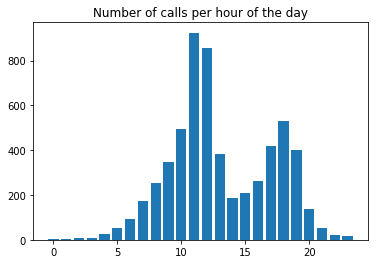

In [9]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Load the data set containing durations between calls arriving at the call center.
# All values are in minutes.
waiting_times_day = np.loadtxt('../call_center.csv')
print('Size of data set:', len(waiting_times_day))
print('First 3 values in data set:', waiting_times_day[:3])
print('Sum of data set:', sum(waiting_times_day))

# Split the data into 24 separate series, one for each hour of the day
current_time = 0
waiting_times_per_hour = [[] for _ in range(24)]  # Make 24 empty lists, one per hour
for t in waiting_times_day:
    current_hour = int(current_time // 60)
    current_time += t
    waiting_times_per_hour[current_hour].append(t)

# Plot the number of calls per hour
plt.bar(range(24), [len(w) for w in waiting_times_per_hour])
plt.title('Number of calls per hour of the day')
plt.show()

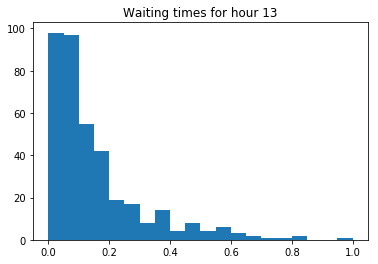

In [10]:
# Plot histogram of waiting times for hour
hour_index = 13
waiting_times_hour = waiting_times_per_hour[hour_index]
plt.hist(waiting_times_hour, bins=20)
plt.title('Waiting times for hour %i' % hour_index)
plt.show()

## Task 1: Fit an exponential distribution to the data for hour 13

1. We do Bayesian inference on this problem
2. **Use the exponential distribution as your likelihood function.** The exponential distribution has 1 parameter, namely the rate $\lambda$.
3. **Use a gamma distribution with parameters $\alpha=1$ and $\beta=0.25$ as your prior.**
4. **Compute the posterior gamma distribution over $\lambda$.** Since the gamma distribution is conjugate to the exponential distribution, it is easy to calculate the parameters of the posterior gamma distribution — use the table on Wikipedia!

In [11]:
prior_alpha = 1
prior_beta = 0.25

posterior_alpha = prior_alpha + len(waiting_times_hour)
posterior_beta = prior_beta + sum(waiting_times_hour)
print('Posterior α = %.1f, β = %.1f' % (posterior_alpha, posterior_beta))

Posterior α = 383.0, β = 60.3


## Task 2: Summarize your results

1. **Compute a 95% confidence interval over the posterior $\lambda$.**
2. **Use the posterior mean of $\lambda$** (the mean is a single value and not a distribution) **to plot an exponential distribution on top of the data histogram for hour 13.** How good is the fit to the data?

Posterior 98% confidence interval over λ: [5.6, 7.1]


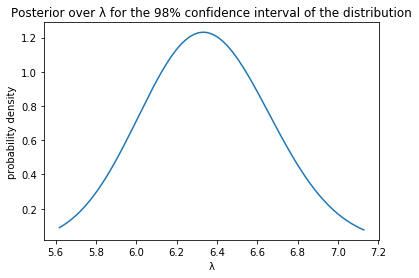

In [13]:
# Create the distribution object. This is the posterior over λ
posterior = stats.gamma(a=posterior_alpha, scale=1/posterior_beta)

confidence_98 = (posterior.ppf(0.01), posterior.ppf(0.99))
print('Posterior 98%% confidence interval over λ: [%.1f, %.1f]' % confidence_98)

# Plot the posterior
x = np.linspace(confidence_98[0], confidence_98[1], 200)
y = posterior.pdf(x)
plt.plot(x, y)
plt.title('Posterior over λ for the 98% confidence interval of the distribution')
plt.xlabel('λ')
plt.ylabel('probability density')
plt.show()

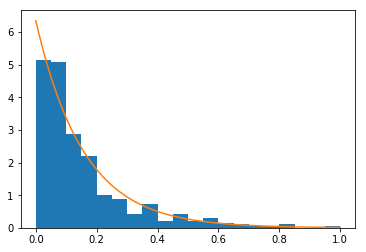

In [5]:
# Get the posterior expected value of λ
lambda_ = posterior.mean()

# Plot the likelihood function for the expected λ on top of the data histogram
plt.hist(waiting_times_hour, bins=20, density=True)
x = np.linspace(0, max(waiting_times_hour), 200)
y = stats.expon.pdf(x, scale=1/lambda_)
plt.plot(x, y)
plt.show()